In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('max_columns', 100)

In [2]:
df = pd.read_csv('data/df_train.csv')
df['zipcode'] = df['zipcode'].astype(np.int32)
df.head()

,incident_day_of_week,incident_hour,zipcode,police_district,crime,population,population_density,housing_units,occupied_housing_units,median_home_value,median_household_income
0,Friday,0,94102,Central,1,31176.0,46472.0,18758.0,16844.0,574100.0,22517.0
1,Friday,0,94102,Mission,23,31176.0,46472.0,18758.0,16844.0,574100.0,22517.0
2,Friday,0,94102,Northern,53,31176.0,46472.0,18758.0,16844.0,574100.0,22517.0
3,Friday,0,94102,Southern,12,31176.0,46472.0,18758.0,16844.0,574100.0,22517.0
4,Friday,0,94102,Taraval,2,31176.0,46472.0,18758.0,16844.0,574100.0,22517.0


In [3]:
def create_counts(col):
    temp = df.groupby(col)['crime'].sum().reset_index()
    temp[col] = temp[col].astype(str)
    return temp[col], temp['crime']

# Relationship between predictors and crime

Text(0.5, 0.98, 'Total Counts of Crimes')

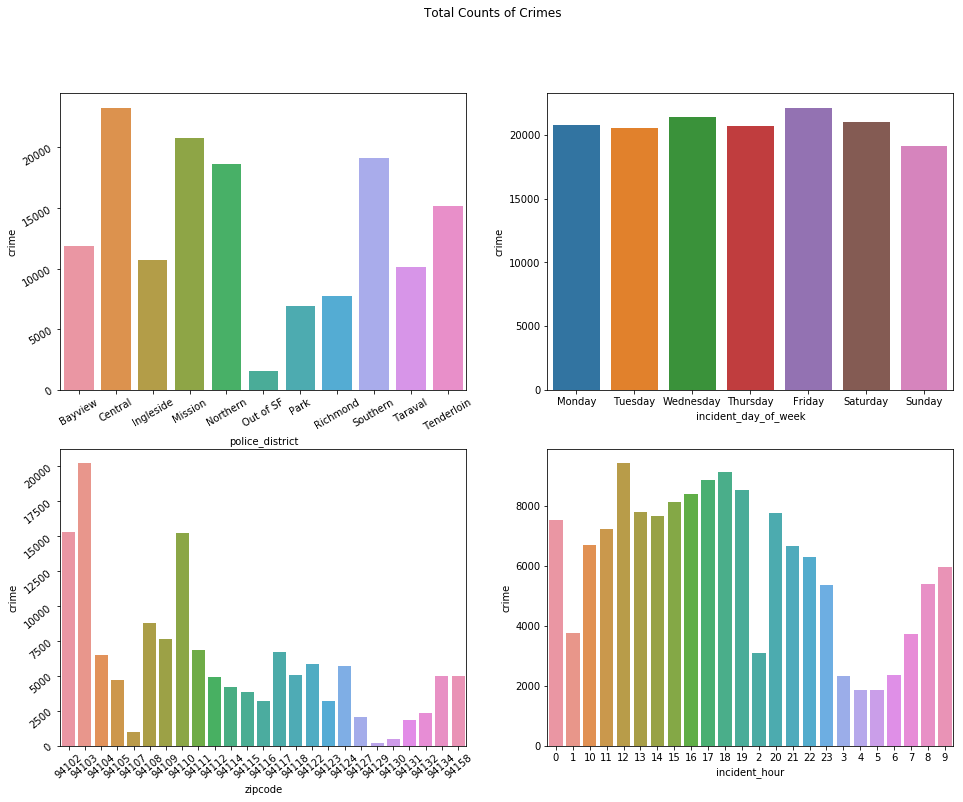

In [4]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fg,ax = plt.subplots(2,2,figsize=(16,12))

x,y = create_counts('incident_day_of_week')
sns.barplot(x,y,ax=ax[0][1],order = order)
x,y = create_counts('police_district')
sns.barplot(x,y,ax=ax[0][0])
x,y = create_counts('incident_hour')
sns.barplot(x,y,ax=ax[1][1])
x,y = create_counts('zipcode')
sns.barplot(x,y,ax=ax[1][0])
ax[0][0].tick_params(labelrotation=30)
ax[1][0].tick_params(labelrotation=40)

fg.suptitle("Total Counts of Crimes")

Text(0.5, 1.0, 'Crime Heatmap')

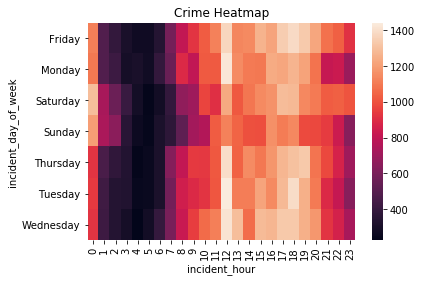

In [5]:
# Crime Heatmap
df_group = df.groupby(['incident_day_of_week', 'incident_hour'])['crime'].sum().reset_index()
heat = pd.pivot_table(df_group, values='crime', index=['incident_day_of_week'],columns=['incident_hour'], aggfunc=np.sum)

sns.heatmap(heat)
plt.title("Crime Heatmap")

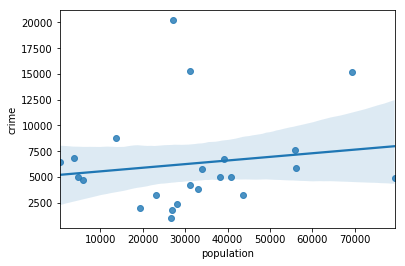

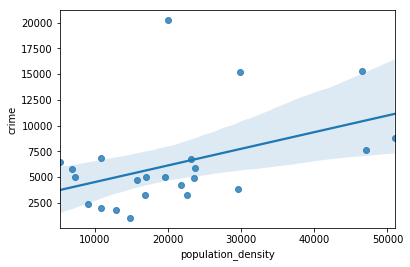

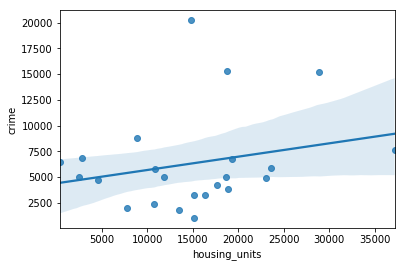

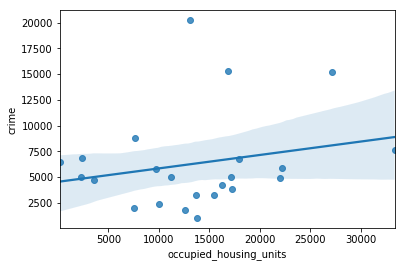

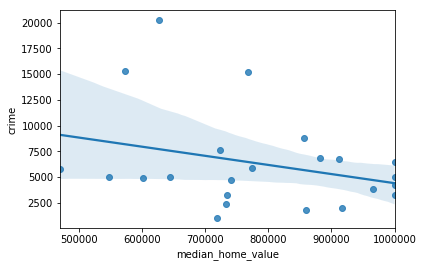

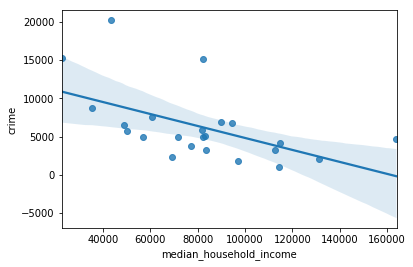

In [6]:
# crime and other factors
mean_cols = ['zipcode', 'population', 'population_density', 'housing_units', 'occupied_housing_units',
             'median_home_value', 'median_household_income']
df_group = df.groupby(mean_cols)['crime'].sum().reset_index()

for col in mean_cols:
    if col == 'zipcode': continue
    sns.regplot(df_group[col], df_group['crime'])
    plt.show()

In [7]:
df_group.drop('zipcode',1).corr()['crime']

population                 0.151769
population_density         0.438356
housing_units              0.239846
occupied_housing_units     0.224037
median_home_value         -0.303159
median_household_income   -0.544149
crime                      1.000000
Name: crime, dtype: float64

We observe some weak positive relationship between `crime` and `population`, `population_density`, `housing_units`, `occupied_housing_units`; some positive relationship between `crime` and  `median_home_value`, and a pretty strong negative relationship with `median_household_income`.

# Crime by Zipcode 

In [8]:
import geopandas
sf = geopandas.read_file('data/zipcodes_geo.json')
sf.crs = {'init': 'epsg:4326'}
sf = sf.set_geometry('geometry')
sf['zip_code'] = sf['zip_code'].astype(np.int32)

Text(0.5, 1.0, '2018 Total Crimes per Zipcode in San Francisco')

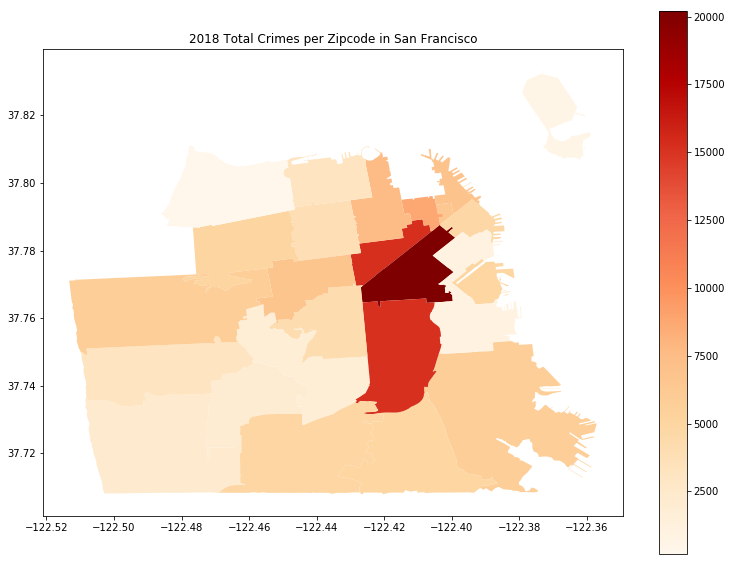

In [9]:
df_zip = df.groupby('zipcode')['crime'].sum().reset_index()

chloropleth_data = pd.merge(sf, df_zip, left_on='zip_code', right_on='zipcode', how = 'right')
chloropleth_data = geopandas.GeoDataFrame(chloropleth_data, geometry='geometry')
chloropleth_data.fillna('0')
chloropleth_data.crs = {'init': 'epsg:4326'}
chloropleth_data.plot(column='crime', cmap='OrRd', figsize=(13,10), legend=True)
plt.title("2018 Total Crimes per Zipcode in San Francisco")